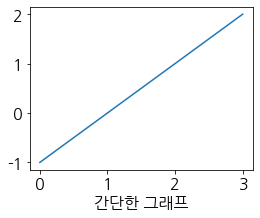

In [19]:
# 그래프 테스트
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.rc('font', size=16)
plt.show()

In [20]:
#2022-06-15 ~ 2023-01-11 까지 몸무게 증량 운동기록(하체) 불러오기
df = pd.read_csv('csv/total.csv')

# 데이터타입, 결측치, 데이터 요약, 이상치 확인
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 49 non-null     int64  
 1   DateTime           49 non-null     object 
 2   Weight(kg)         49 non-null     float64
 3   Pendlay_row(kg)    49 non-null     float64
 4   OHP(kg)            49 non-null     float64
 5   Squat(kg)          49 non-null     float64
 6   Sumo_deadlift(kg)  49 non-null     float64
 7   Rest_Period(day)   49 non-null     int64  
 8   Workout_time       49 non-null     int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 3.6+ KB


,ID,Weight(kg),Pendlay_row(kg),OHP(kg),Squat(kg),Sumo_deadlift(kg),Rest_Period(day),Workout_time
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,24.00000,72.883673,97.167347,69.602041,139.942857,160.420408,3.612245,1.306122
std,14.28869,3.649563,8.004904,4.677851,14.895147,16.536550,1.987632,0.713094
min,0.00000,66.300000,72.500000,55.000000,100.000000,120.000000,1.000000,0.000000
25%,12.00000,70.200000,92.500000,68.000000,134.800000,152.500000,3.000000,1.000000
50%,24.00000,72.000000,98.000000,71.000000,142.000000,163.000000,3.000000,1.000000
75%,36.00000,75.600000,103.500000,72.500000,150.000000,172.500000,4.000000,2.000000
max,48.00000,79.500000,106.800000,76.000000,163.000000,189.000000,12.000000,2.000000


In [21]:
# DateTime 형변환
df['DateTime'] = df['DateTime'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 49 non-null     int64         
 1   DateTime           49 non-null     datetime64[ns]
 2   Weight(kg)         49 non-null     float64       
 3   Pendlay_row(kg)    49 non-null     float64       
 4   OHP(kg)            49 non-null     float64       
 5   Squat(kg)          49 non-null     float64       
 6   Sumo_deadlift(kg)  49 non-null     float64       
 7   Rest_Period(day)   49 non-null     int64         
 8   Workout_time       49 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 3.6 KB


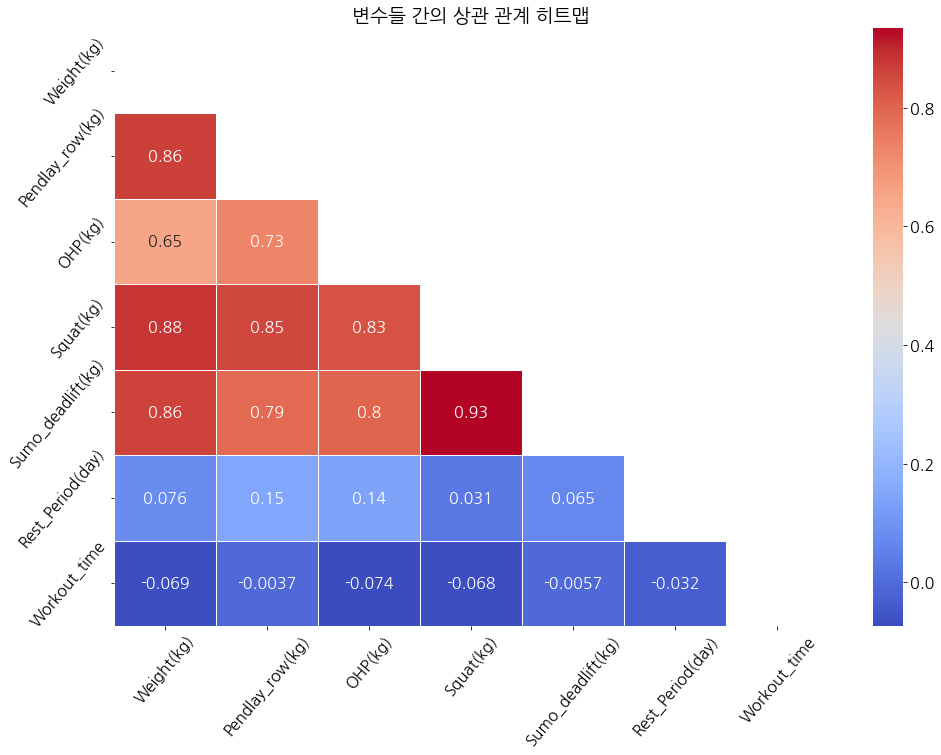

In [22]:
df2 = df.drop(['ID'], axis=1).copy()

# 상관 계수 행렬 계산
correlation_matrix = df2.corr()

# 중복데이터 제거를 위해 대각선 아래쪽 셀 가리기
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(16, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)

# x축 레이블을 45도로 회전
plt.xticks(rotation=50)
plt.yticks(rotation=50)

plt.title('변수들 간의 상관 관계 히트맵')
plt.show()